In [ ]:
%matplotlib inline


Extracting signals from a brain parcellation
============================================

Here we show how to extract signals from a brain parcellation and compute
a correlation matrix.

We also show the importance of defining good confounds signals: the
first correlation matrix is computed after regressing out simple
confounds signals: movement regressors, white matter and CSF signals, ...
The second one is without any confounds: all regions are connected to
each other.


One reference that discusses the importance of confounds is `Varoquaux and
Craddock, Learning and comparing functional connectomes across subjects,
NeuroImage 2013
<http://www.sciencedirect.com/science/article/pii/S1053811913003340>`_.

This is just a code example, see the `corresponding section in the
documentation <parcellation_time_series>` for more.

<div class="alert alert-info"><h4>Note</h4><p>This example needs SciPy >= 1.0.0 for the reordering of the matrix.</p></div>



Retrieve the atlas and the data
--------------------------------



In [5]:
from nilearn import datasets
parcellations = datasets.fetch_atlas_basc_multiscale_2015()

In [ ]:
parcellations.scale197

In [27]:
from nilearn import datasets

#dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
#atlas_filename = dataset.maps
#labels = dataset.labels
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064


print('Atlas ROIs are located in nifti image (4D) at: %s' %
       atlas_filename)

Atlas ROIs are located in nifti image (4D) at: /Users/jakevogel/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz


Let's have a look at that atlas

//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


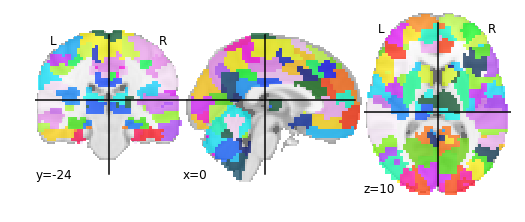

In [28]:
import matplotlib.pyplot as plt
from nilearn import plotting


plt.close()
plotting.plot_roi(atlas)
plt.show()

Great, let's load an example 4D fmri time-series for one subject

In [29]:
# One subject of resting-state data
data = datasets.fetch_adhd(n_subjects=1)
fmri_filenames = data.func[0]
print('fmri timeseries are located in nifti image (4D) at: %s' %
       fmri_filenames)  # 4D data

fmri timeseries are located in nifti image (4D) at: /Users/jakevogel/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


And let's have a look at that

In [30]:
plt.close()
plotting.plot_epi(fmri_filenames)
plt.show()

DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See http://nilearn.github.io/manipulating_images/input_output.html.

Uh oh! An error! What's the problem here?

In [38]:
from nilearn.image import load_img
from nibabel import Nifti1Image
myImg = load_img(fmri_filenames)
myImg_data = myImg.get_data()
myImg_aff = myImg.affine

averaged_data = myImg_data.mean(axis=3)
averaged_Img = Nifti1Image(averaged_data, myImg_aff)

Let's try that again

//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


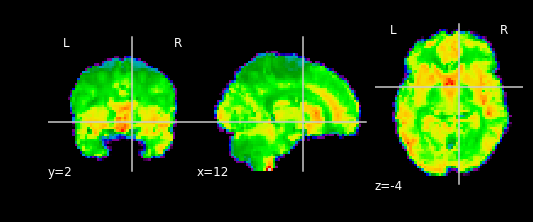

In [32]:
plt.close()
plotting.plot_epi(averaged_Img)
plt.show()

Extract signals on a parcellation defined by labels
-----------------------------------------------------
Using the NiftiLabelsMasker



In [39]:
jnk = image.load_img(atlas_filename)

In [40]:
jnk.shape

(53, 64, 52)

In [41]:
myImg.shape

(61, 73, 61, 176)

In [48]:
res_atlas = image.resample_to_img(jnk,averaged_Img, interpolation='nearest')

//anaconda/envs/py3/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
//anaconda/envs/py3/lib/python3.5/site-packages/nilearn/plotting/displays.py:649: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
//anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:861: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


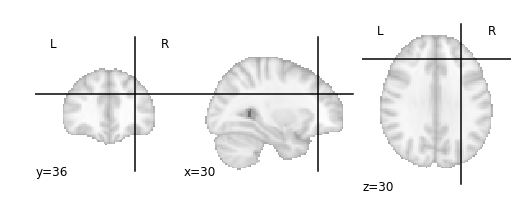

In [49]:
plt.close()
plotting.plot_roi(res_atlas)
plt.show()

In [35]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=5)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform(myImg, confounds=data.confounds)

[NiftiLabelsMasker.fit_transform] loading data from /Users/jakevogel/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
Resampling labels


//anaconda/envs/py3/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x114c547b8>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x114b45128>, 
{ 'background_label': 0,
  'detrend': False,
  'high_pass': None,
  'labels_img': '/Users/jakevogel/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, memory=Memory(cachedir='nilearn_cache/joblib'), memory_level=1, verbose=5, confounds=['/Users/jakevogel/nilearn_data/adhd/data/0010042/0010042_regressors.csv'])
[NiftiLabelsMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/jakevogel/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_

In [13]:
type(time_series)

numpy.ndarray

In [37]:
time_series

array([], shape=(176, 0), dtype=float64)

Compute and display a correlation matrix
-----------------------------------------



In [ ]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
import numpy as np
from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)

Same thing without confounds, to stress the importance of confounds
--------------------------------------------------------------------



In [ ]:
time_series = masker.fit_transform(fmri_filenames)
# Note how we did not specify confounds above. This is bad!

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, title='No confounds', reorder=True)

plotting.show()